 1. Perform Exploratory data analysis. 
    ○ What can you conclude from methods of central tendency and deviation of
    the variables? - We can conclude that the data doesn't follow normal distribution for the most part, only age has normal distribution
    ○ Are there any correlated variables? There are No variables which are highly correlated in the heatmap, so we are not removing any variables. 
    ○ Interpret the skewness of the variables. - disproportionate number of people are present in the first year of the dataset and the average age of the patients is around 50, and the vast majority have no auxillary nodes.

In [1]:
# load the data

import pandas as pd

data = pd.read_csv("cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
# Summary Statistics

data.describe()



,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


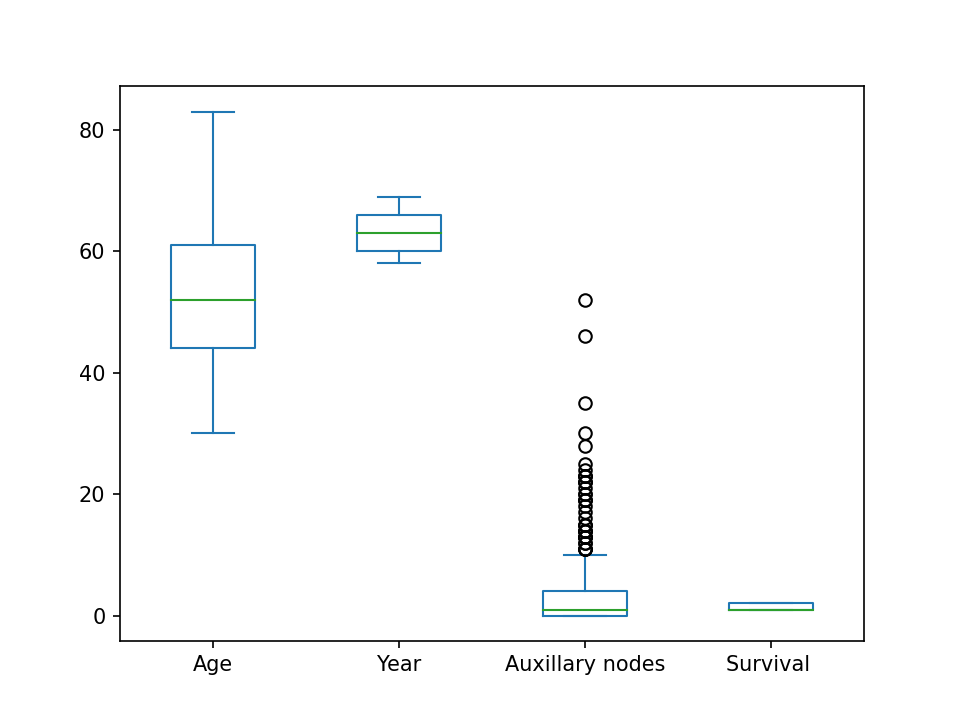

<AxesSubplot:>

In [3]:
# Blox Plot

%matplotlib notebook

data.plot.box()


<IPython.core.display.Javascript object>


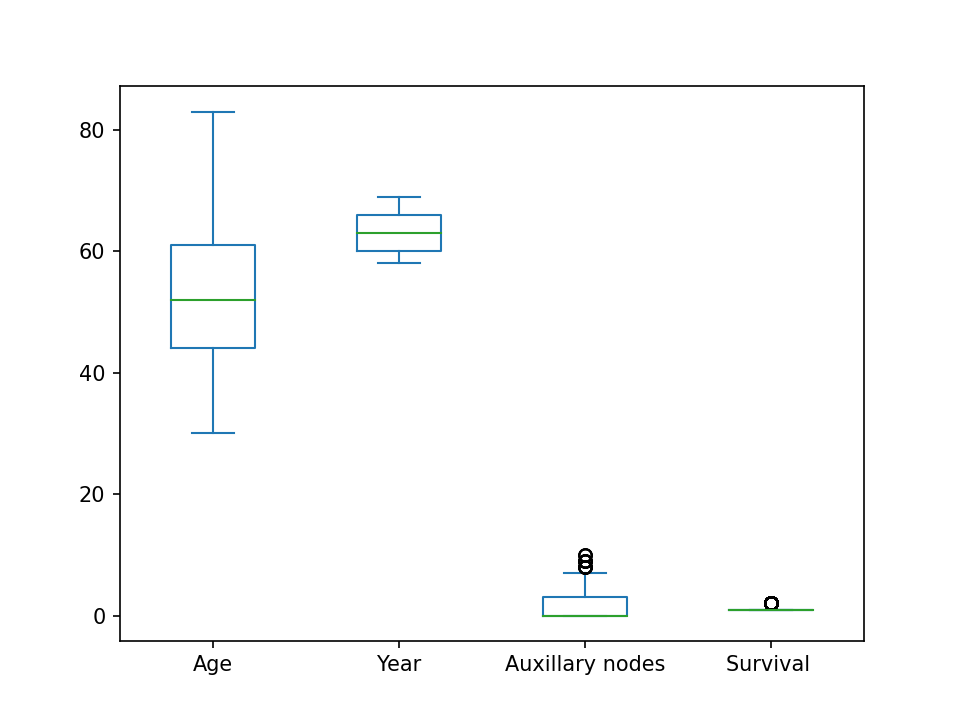

<AxesSubplot:>

In [4]:
# Outliers

# Max = 75% + 1.5 * (75% - 25%)
maximum = 4 + 1.5*(4-0)

new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()

In [5]:
# Correlation

corr = new_data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


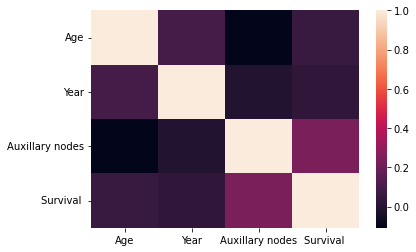

In [6]:
# visualization - correlation

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

plt.show()

# Remove correlated variables

we don't have any correlated variables. # No variables present which are highly correlated in the heatmap, so we are not removing any variables and cannot rely on this





,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


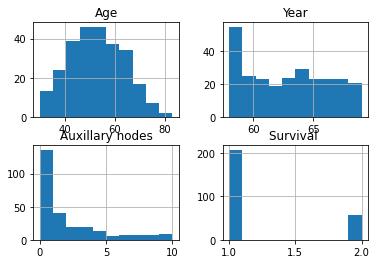

In [7]:
# skewness

new_data.hist()

new_data


C:\Users\vinil\AppData\Local\Temp/ipykernel_22464/3378385529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

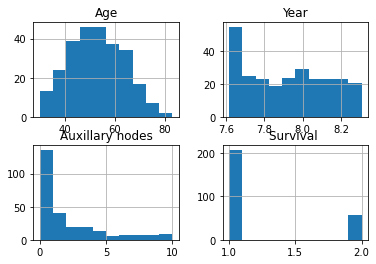

In [8]:
# Removing Skewness


new_data["Year"] = new_data["Year"]**(0.5)

new_data.hist()


In [9]:
# Standardization and Normalization 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(new_data)

scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns=new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.246077,0.507659,-0.529333
1,-2.078151,0.669605,-0.672425,-0.529333
2,-1.986534,-1.184194,0.114297,-0.529333
3,-1.986534,0.669605,0.901020,-0.529333
4,-1.803300,-1.502178,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.246077,-0.279064,-0.529333
261,2.136233,1.268362,-0.672425,-0.529333
262,2.227850,0.669605,0.507659,-0.529333
263,2.319467,0.669605,-0.279064,1.889171


In [10]:
new_data.to_csv("final.csv")

2. Develop Supervised learning models. 
   ○ Logistic Regression
   ○ Random Forest
   ○ Support Vector Machine
   ○ Neural Network
   Compare the 4 methods based on the performance metrics and identify the best
   model for this problem.
- Use 10 - fold cross validation.
- Use GridSearchCV for searching through hyper parameters. /// 

In [11]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

In [12]:
# Import data
data = pd.read_csv("final.csv")

#data = data.drop(columns = ["Year"])
#data = data.drop(columns = ["Age"])
#data = data.drop(columns = ["Auxillary nodes"])

# Pre Processing
# Standardization and Normalization - Scikit-learn


# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,30,7.874008,3,1
1,1,30,8.062258,0,1
2,2,31,7.681146,2,1
3,3,31,8.062258,4,1
4,4,33,7.615773,10,1
...,...,...,...,...,...
260,300,75,7.874008,1,1
261,301,76,8.185353,0,1
262,302,77,8.062258,3,1
263,303,78,8.062258,1,2


              precision    recall  f1-score   support

           1       0.75      0.99      0.85        78
           2       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



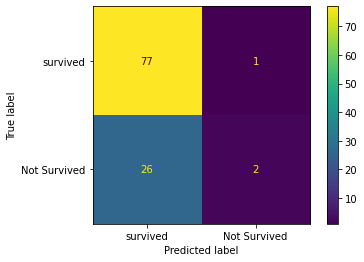

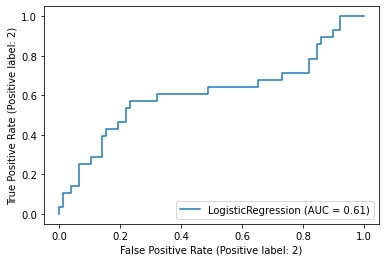

In [14]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "liblinear", penalty = "l2", random_state= 42).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["survived", "Not Survived"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

# Random Forest

              precision    recall  f1-score   support

           1       0.73      0.88      0.80        78
           2       0.18      0.07      0.10        28

    accuracy                           0.67       106
   macro avg       0.45      0.48      0.45       106
weighted avg       0.58      0.67      0.61       106



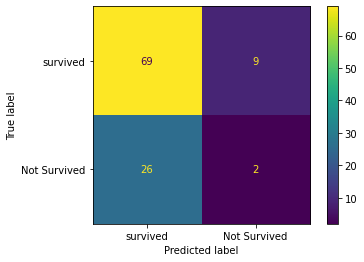

In [15]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 90, max_depth = 6, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

# Support Vector Machine

              precision    recall  f1-score   support

           1       0.73      0.99      0.84        78
           2       0.00      0.00      0.00        28

    accuracy                           0.73       106
   macro avg       0.37      0.49      0.42       106
weighted avg       0.54      0.73      0.62       106



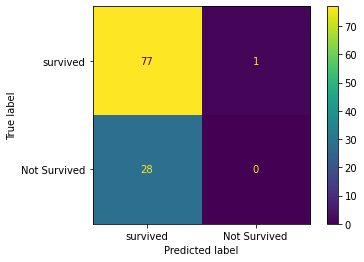

In [16]:
# Developing and fitting the Support Vector Machine

svm = SVC(kernel = "rbf", gamma = 'auto').fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

# Neural Network

              precision    recall  f1-score   support

           1       0.75      0.96      0.84        78
           2       0.50      0.11      0.18        28

    accuracy                           0.74       106
   macro avg       0.62      0.53      0.51       106
weighted avg       0.68      0.74      0.67       106



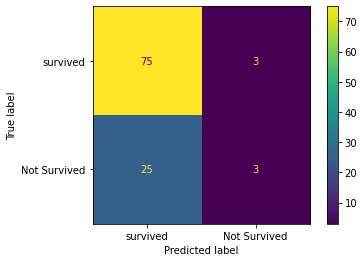

In [17]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (30,), random_state = 1, activation = "relu", learning_rate_init = 1.0).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

# Calculate Best HyperParameters

In [18]:
# Calculating best hyperparameters for Logistic Regression

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty':('none', 'l1', 'l2', 'elasticnet'), 'C':(100, 10, 1, 0.1, 0.01)}

clf_grid = GridSearchCV(clf, parameters, n_jobs=23)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_



C:\Users\vinil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79254032 0.79254032        nan 0.81129032 0.81129032        nan
        nan 0.79254032        nan 0.81129032 0.79254032 0.79254032
 0.79879032 0.81129032 0.81129032        nan        nan        nan
        nan        nan 0.79254032 0.79254032        nan 0.81129032
 0.81129032        nan        nan 0.80504032        nan 0.81129032
 0.79254032 0.79254032 0.81149194 0.81129032 0.81129032        nan
        nan        nan        nan        nan 0.79254032 0.79254032
        nan 0.81129032 0.81129032        nan        nan 0.81129032
        nan 0.81129032 0.79254032 0.79254032 0.81754032 0.81129032
 0.81129032        nan        nan        nan        nan        nan
 0.79254032 0.79254032        nan 0.81129032 0.81129032        nan
        nan 0.80504032        nan 0.81129032 0.80504032 0.80504032
 0.79879032 0.81129032 0.81129032        nan        n

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [19]:
# Calculating best hyperparameters for forest algorithm

parameters = {'n_estimators':range(90, 100, 1), 'max_depth':range(3, 7, 1), 'max_features':('sqrt', 'log2')}

rf_grid = GridSearchCV(rf, parameters, n_jobs=23)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 91}

In [20]:
# Calculate best hyperparameters for Support Vector Machine

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),'gamma':('scale', 'auto')}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
# Calculate best hyperparameters for Neural Network

parameters = {'solver':('lbfgs', 'sgd', 'adam'),'learning_rate':('constant', 'invscaling', 'adaptive'),'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':range(1, 100), 'learning_rate_init':(1, 10, 100)}

nn_grid = GridSearchCV(nn, parameters, n_jobs=23)
nn_grid.fit(X_train, y_train)
nn_grid.best_params_

### Cross Validation

In [22]:
# Implement k-fold cross validation
# Logistic Regression

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333


In [23]:
# Implement k-fold cross validation
# Random Forest

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1


Accuracy for iteration 1 is 0.875
Accuracy for iteration 2 is 0.8125
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.8


In [24]:
# Implement k-fold cross validation
# Support Vector Machine

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.8


In [25]:
# Implement k-fold cross validation
# Neural Network

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.8125
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75


C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Accuracy for iteration 5 is 0.6875
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 0.9375
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.9333333333333333


C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vinil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

3. Evaluate if the algorithms are overfitting?

Based on the performance metrics Logistic Regression was the best one with 71% accuracy. So based on this we can say that the test data set is not relevant to analyse the correct results. The samples are bad. We need more data which is relevant to make the predictions.
All the 4 algorithms resulted in underfitting. Based on the evaluation on the training dataset using kfold we see that test dataset is significantly better than the performance on the training dataset.
Underfitting: Poor performance on the training data,

4. Develop a function which can implement machine learning. (20)
   def machine_learning (data, algorithm):
   …..
   …..
   plot ROC curve
   return performance metrics
   Function call: machine_learning (data, neural_network)

In [30]:
def machine_learning (datafile, algorithm, preprocessing=None, optimizationthreads=None):
    # Import Libraries
    import pandas as pd
    import matplotlib.pyplot as plt

    # Scikit learn - machine learning algorithms and methods
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
    
    # Import data
    data = pd.read_csv("final.csv")
    # Create features/inputs
    X = data.drop(columns = ["Survival "])
    # Create the output/class
    y = data["Survival "]
    # Splitting into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    # Creating the labels
    labels = ["survived", "Not Survived"]

    # Preprocessing
    if preprocessing == "standardize":
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler() # Standardize
        scaler.fit(data)
        scaled = scaler.fit_transform(data)
        data = pd.DataFrame(scaled, columns = data.columns)
    elif preprocessing == "normalize":
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler() # Normalize
        scaler.fit(data)
        scaled = scaler.fit_transform(data)
        data = pd.DataFrame(scaled, columns = data.columns)
    elif preprocessing == "none":
        print("Not performing preprocessing")
    else:
        print("No match found for preprocessing setting")
        print("Not performing preprocessing")

    # Algorithm
    # Logistic Regression
    if algorithm == "lr":
        lr = LogisticRegression(solver = "liblinear", penalty = "l2").fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty':('none', 'l1', 'l2', 'elasticnet'), 'C':(100, 10, 1, 0.1, 0.01)}
            lr_grid = GridSearchCV(lr, parameters, n_jobs=optimizationthreads)
            lr_grid.fit(X_train, y_train)
            bp = lr_grid.best_params_
            lr = LogisticRegression(solver = bp['solver'], penalty = bp['penalty'], random_state = 42).fit(X_train, y_train)
            
        plot_roc_curve(lr, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = lr.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = lr.classes_))
        
    # Random Forest        
    elif algorithm == "rf":
        rf = RandomForestClassifier(n_estimators = 90, max_depth = 6, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'n_estimators':range(90, 100, 1), 'max_depth':range(3, 7, 1), 'max_features':('sqrt', 'log2')}
            rf_grid = GridSearchCV(rf, parameters, n_jobs=optimizationthreads)
            rf_grid.fit(X_train, y_train)
            bp = rf_grid.best_params_
            rf = RandomForestClassifier(n_estimators = bp['n_estimators'], max_depth = bp['max_depth'], max_features = bp['max_features'], random_state = 0).fit(X_train, y_train)            
        
        plot_roc_curve(rf, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = rf.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = rf.classes_))
        
    # Support Vector Machine        
    elif algorithm == "svm":
        svm = SVC( kernel = "rbf", gamma = 'auto').fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'gamma':('scale', 'auto')}
            svm_grid = GridSearchCV(svm, parameters, n_jobs=optimizationthreads)
            svm_grid.fit(X_train, y_train)
            bp = svm_grid.best_params_
            svm = SVC( kernel = bp['kernel'], gamma = bp['gamma']).fit(X_train, y_train)            
        
        plot_roc_curve(svm, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = svm.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = svm.classes_))
        
    # Neural Network        
    elif algorithm == "nn":
        nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (30,), random_state = 1, activation = "relu", learning_rate_init = 1.0).fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'solver':('lbfgs', 'sgd', 'adam'),'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':range(1, 100), 'learning_rate_init':(1, 10, 100)}
            nn_grid = GridSearchCV(nn, parameters, n_jobs=23)
            nn_grid.fit(X_train, y_train)
            bp = nn_grid.best_params_
            nn = MLPClassifier(solver = bp['solver'], alpha = 0.0001, hidden_layer_sizes = ((bp['hidden_layer_sizes']),), random_state = 1, activation = bp['activation'], learning_rate_init = bp['learning_rate_init']).fit(X_train, y_train)    
        
        plot_roc_curve(nn, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = nn.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = nn.classes_))

    # Thread Count

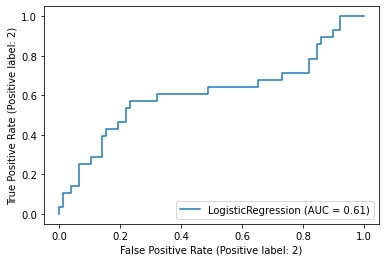

              precision    recall  f1-score   support

           1       0.75      0.99      0.85        78
           2       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



In [31]:
machine_learning('final.csv','lr', 'normalize')